In [1]:
import data_acquisition
import data_preprocessing

In [2]:
# Infos über neue Daten
files = data_acquisition.get_new_files_info()

# Datenbeschaffung
data, date_info = data_acquisition.get_new_data(files)

# Datenfilterung
filtered_data = data_preprocessing.filter_data(data)

viz_data = data_preprocessing.preprocess_data(filtered_data.copy(), date_info)

API-Anfrage erfolgreich
Liste mit allen verfügbaren Daten erstellt.
Neue Daten vorhanden.
Download von Datei https://download.open.fda.gov/drug/event/2020q1/drug-event-0001-of-0033.json.zip gestartet.
Download abgeschlossen.
JSON-Datei entpackt.
Counter hochgezählt. Dieser ist nun 1.
Counter-Datei aktualisiert.
c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\json\2020 Q1\drug-event-0001-of-0033.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   safetyreportversion                       12000 non-null  object
 1   safetyreportid                            12000 non-null  object
 2   primarysourcecountry                      11875 non-null  object
 3   occurcountry                              12000 non-null  object
 4   transmissiondateformat                    12000 non-null  ob

AttributeError: 'int' object has no attribute 'astype'

In [8]:
import os

prefix = 'viz_'
counter = str(data_acquisition.read_counter_val())
time_label = '_' + date_info.replace(" ","")
path = r'c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\viz'
file_name = prefix + counter + time_label
print(os.path.join(path, file_name))

Counter-Wert ist: 1
c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\viz\viz_1_2020Q1(part1of33)


In [1]:
import pandas as pd
df = pd.read_csv('../Daten/csv/ml/2019_sas_ml.csv')

In [2]:
df.rename(columns={'route_intra-arterial': 'route_intraarterial', 'route_respiratory (inhalation)': 'route_respiratory_inhalation'}, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158739 entries, 0 to 158738
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   age                              158739 non-null  int64 
 1   country_ca                       158739 non-null  int64 
 2   country_cn                       158739 non-null  int64 
 3   country_de                       158739 non-null  int64 
 4   country_es                       158739 non-null  int64 
 5   country_fr                       158739 non-null  int64 
 6   country_gb                       158739 non-null  int64 
 7   country_it                       158739 non-null  int64 
 8   country_jp                       158739 non-null  int64 
 9   country_nl                       158739 non-null  int64 
 10  country_other_or_unknown         158739 non-null  int64 
 11  country_us                       158739 non-null  int64 
 12  gender_female   

In [6]:
df.drop('receivedate', axis=1, inplace=True)

In [7]:
df.to_csv('../Daten/csv/ml/2019_sas_ml.csv', index=False)

In [3]:
ref_data = pd.read_csv('../Daten/csv/ml/ml_0_2019.csv')

In [4]:
ref_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158739 entries, 0 to 158738
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   age                              158739 non-null  int64
 1   country_ca                       158739 non-null  int64
 2   country_cn                       158739 non-null  int64
 3   country_de                       158739 non-null  int64
 4   country_es                       158739 non-null  int64
 5   country_fr                       158739 non-null  int64
 6   country_gb                       158739 non-null  int64
 7   country_it                       158739 non-null  int64
 8   country_jp                       158739 non-null  int64
 9   country_nl                       158739 non-null  int64
 10  country_other_or_unknown         158739 non-null  int64
 11  country_us                       158739 non-null  int64
 12  gender_female                 

In [6]:
new_data = pd.read_csv('../Daten/csv/ml/ml_3_2020Q1(part3of33).csv')

In [1]:
alg = 'LR lbg'
date_info = '2020Q1'
alg + date_info

'LR lbg2020Q1'

In [4]:
text = "LR_lbfgs_2020Q1"
output_text = text.split("_")
print(output_text[-1])
print(output_text[0]+'_'+output_text[1])

2020Q1
LR_lbfgs


In [5]:
text.split("_")[-1]

'2020Q1'

In [53]:
experiment_ids = ["979371847493615015", "362962593789386146", "483608512614901861", "493971055348705960"]
model_names = ['LR Model lbfgs', 'LR Model newton-cholesky', 'RF Model 40 trees', 'RF Model 20 trees']
import pandas as pd
from sklearn.preprocessing import StandardScaler
import mlflow
#mlflow.sklearn.autolog(log_models=False)
mlflow.sklearn.autolog(disable=True)

def log_model_performance(data , date_info):
    import mlflow
    from sklearn import metrics

    # für jedes Modell die Metriken berechnen und loggen
    run_names = ['LR_lbfgs_', 'LR_newton-cholesky_', 'RF_40trees_', 'RF_20trees_']

    # Labels 
    true_labels = data.serious
    X_test = data.drop('serious', axis=1)

    for model, exp_id, run_name in zip(model_names, experiment_ids, run_names):
        cur_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model}/latest")
        print("Modell geladen: " + model)
        cur_run_name = run_name + date_info
        print("Runname: " + cur_run_name)

        with mlflow.start_run(experiment_id=exp_id, run_name=cur_run_name) as run:
            # Use the model to make predictions on the test dataset.
            predictions = cur_model.predict(X_test)

            # Test Metrics
            #test_accuracy = metrics.accuracy_score(true_labels, predictions)
            test_f1 = metrics.f1_score(true_labels, predictions)
            mlflow.log_metric('f1_score_X_test', test_f1)
            #test_precision = metrics.precision_score(true_labels, predictions)
            #test_recall = metrics.recall_score(true_labels, predictions)

            print("Test-Metriken für {} berechnet und geloggt".format(model))

new_data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_1_2020Q1(part1of33).csv")
# Initialisiere den StandardScaler
scaler = StandardScaler()
# Wende den StandardScaler nur auf die 'age'-Spalte an
new_data['age'] = scaler.fit_transform(new_data[['age']])

log_model_performance(new_data, '2020Q1(part1of33)')

Modell geladen: LR Model lbfgs
Runname: LR_lbfgs_2020Q1(part1of33)
Test-Metriken für LR Model lbfgs berechnet und geloggt
Modell geladen: LR Model newton-cholesky
Runname: LR_newton-cholesky_2020Q1(part1of33)
Test-Metriken für LR Model newton-cholesky berechnet und geloggt
Modell geladen: RF Model 40 trees
Runname: RF_40trees_2020Q1(part1of33)
Test-Metriken für RF Model 40 trees berechnet und geloggt
Modell geladen: RF Model 20 trees
Runname: RF_20trees_2020Q1(part1of33)
Test-Metriken für RF Model 20 trees berechnet und geloggt


In [1]:
experiment_ids = ["532585148427554333", "142704143808532679", "654653382223571780", "892816848484979934"]
model_names = ['LR Model lbfgs', 'LR Model newton-cholesky', 'RF Model 20 trees', 'RF Model 40 trees']
# Dict der Modells, um die Experiment-ID zu den Modells mappen zu können
model_dict = {"532585148427554333": "LR Model lbfgs",
            "142704143808532679": "LR Model newton-cholesky",
            "654653382223571780": "RF Model 20 trees",
            "892816848484979934": "RF Model 40 trees"}

In [2]:
import mlflow

run = mlflow.search_runs(
    experiment_ids=experiment_ids,
    order_by=["start_time"],
)

run['model'] = run['experiment_id'].replace(model_dict)
run['date'] = run['tags.mlflow.runName'].apply(lambda x: x.split('_')[-1])
data = run[['model','metrics.f1_score_X_test', 'date']]

In [3]:
data

,model,metrics.f1_score_X_test,date
0,LR Model lbfgs,0.839608,2019
1,LR Model newton-cholesky,0.839643,2019
2,RF Model 20 trees,0.843651,2019
3,RF Model 40 trees,0.844502,2019


In [8]:
run = mlflow.search_runs(
    experiment_ids=experiment_ids,
    order_by=["metrics.f1_score_X_test DESC"],
)

In [9]:
run

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_score_X_test,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.log-model.history
0,8b8ec4ff7d2d4c26a200d1c5072573e2,892816848484979934,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-15 15:31:22.199000+00:00,2023-08-15 15:31:42.417000+00:00,0.844502,C:\Users\Paul Strohmeier\AppData\Roaming\Pytho...,RF_40trees_2019,Paul Strohmeier,LOCAL,"[{""run_id"": ""8b8ec4ff7d2d4c26a200d1c5072573e2""..."
1,40e80545576b4b6d929c2a0c5e512396,654653382223571780,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-15 15:31:02.759000+00:00,2023-08-15 15:31:17.794000+00:00,0.843651,C:\Users\Paul Strohmeier\AppData\Roaming\Pytho...,RF_20trees_2019,Paul Strohmeier,LOCAL,"[{""run_id"": ""40e80545576b4b6d929c2a0c5e512396""..."
2,62f1f073941744ae9585596e4760b79e,142704143808532679,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-15 15:30:54.375000+00:00,2023-08-15 15:31:02.704000+00:00,0.839643,C:\Users\Paul Strohmeier\AppData\Roaming\Pytho...,LR_newton-cholesky_2019,Paul Strohmeier,LOCAL,"[{""run_id"": ""62f1f073941744ae9585596e4760b79e""..."
3,84a4374c1ff14aa386edb241698c73f8,532585148427554333,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-15 15:30:09.134000+00:00,2023-08-15 15:30:23.040000+00:00,0.839608,C:\Users\Paul Strohmeier\AppData\Roaming\Pytho...,LR_lbfgs_2019,Paul Strohmeier,LOCAL,"[{""run_id"": ""84a4374c1ff14aa386edb241698c73f8""..."


In [25]:
import json
f1_file = r'c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\best_f1.json'

with open(f1_file, 'r') as file:
    data = json.load(file)
    best_exp_id = data['experiment_id']
    best_f1_score = data['f1-score']
print("Modell von bestem F1-Wert: {}".format(model_dict[best_exp_id]))
print("Bester F1-Wert seit letztem Training: {}".format(best_f1_score))

Modell von bestem F1-Wert: RF Model 40 trees
Bester F1-Wert seit letztem Training: 0.844502


In [30]:
training_dates = r'c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\training_dates.json'
with open(training_dates, 'r+') as file:
    data = json.load(file)
    data['training-dates'].append('2020Q3')
    file.seek(0)
    json.dump(data, file)
print("Training-Dates aktualisiert.")

Training-Dates aktualisiert.


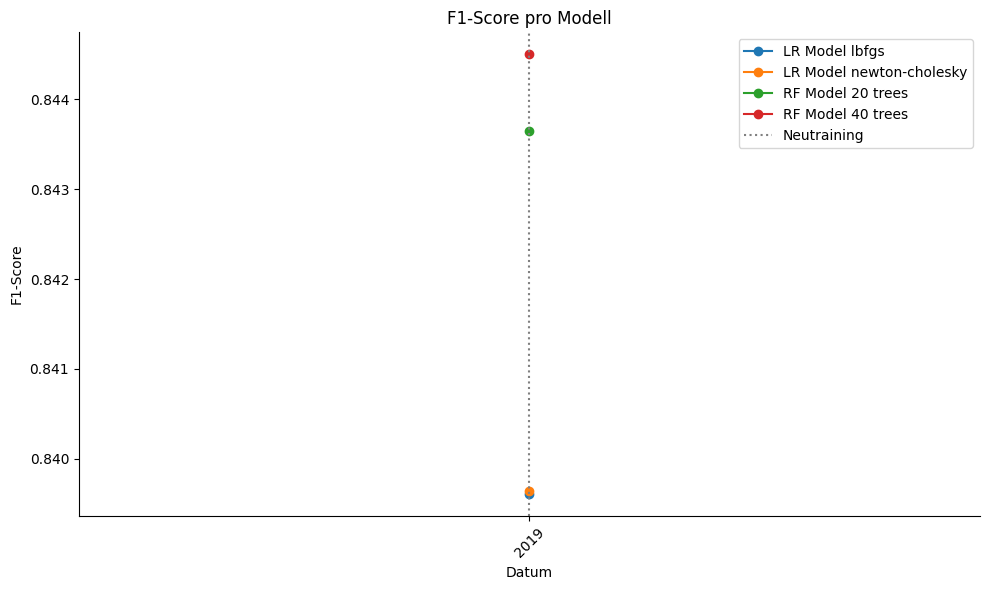

In [34]:
import mlflow
import matplotlib.pyplot as plt
import os
import json

run = mlflow.search_runs(
    experiment_ids=experiment_ids,
    order_by=["start_time"],
)

run['model'] = run['experiment_id'].replace(model_dict)
run['date'] = run['tags.mlflow.runName'].apply(lambda x: x.split('_')[-1])
data = run[['model','metrics.f1_score_X_test', 'date']]

plt.figure(figsize=(10, 6))
for model, subset in data.groupby('model'):
    plt.plot(subset['date'], subset['metrics.f1_score_X_test'], marker='o', label=model)

# Füge Markierungen für neutrainierte Jahre hinzu
training_dates = r'c:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\training_dates.json'
with open(training_dates, 'r') as file:
    neutraining_dates = json.load(file)
for year in neutraining_dates['training-dates']:
    plt.axvline(x=year, color='gray', linestyle=':', linewidth=1.5, label='Training der Modelle')

plt.xlabel('Datum')
plt.ylabel('F1-Score')
plt.title('F1-Score pro Modell')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [38]:
# besten F1-Score der vier Runs ermitteln
new_data_best_f1_score = 0

for x in range(10):
    if x > new_data_best_f1_score:
        new_data_best_f1_score = x


In [39]:
new_data_best_f1_score

9

In [1]:
import mlflow
new_runs = mlflow.search_runs(
    experiment
    max_results = 4,
    order_by=["start_time DESC"],
)
new_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time


In [68]:
new_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time


In [51]:
new_runs = new_runs.sort_values(by=['metrics.f1_score_X_test'], ascending=False)

In [53]:
new_runs.experiment_id[0]

'373362154118842558'

In [66]:
model_names = ['LR Model lbfgs', 'LR Model newton-cholesky', 'RF Model 100 trees', 'RF Model 50 trees']
experiment_ids = ["162780180761233810", "872432955164259172", "889731811179229434", "373362154118842558"]
run_names = ['LR_lbfgs_', 'LR_newton-cholesky_', 'RF_100trees_', 'RF_50trees_']

model = 'RF Model 100 trees'

cur_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model}/latest")

OSError: No such file or directory: 'C:\Users\Paul Strohmeier\Desktop\ma-accantec\Code\mlruns\889731811179229434\5e26cc7c76854117ab4d6a38de0bbb08\artifacts\RF Model 100 trees\.'

In [65]:
cur_model

mlflow.pyfunc.loaded_model:
  artifact_path: LR Model lbfgs
  flavor: mlflow.sklearn
  run_id: 0d5d4fa4799f4b58b994fd0e8f49d864

In [57]:
new_runs = mlflow.search_runs(
    experiment_ids=experiment_ids,
    max_results = 4,
    order_by=["start_time DESC"],
)
new_runs = new_runs.sort_values(by=['metrics.f1_score_X_test'], ascending=False)

In [60]:
other_models

['LR Model lbfgs', 'LR Model newton-cholesky']

In [63]:
# Tag der Modelle setzen
client = mlflow.MlflowClient()
for model in other_models:
    client.set_registered_model_tag(model, "role", "none")

In [2]:
experiment_ids = ["162780180761233810", "872432955164259172", "889731811179229434", "373362154118842558"]
a = experiment_ids[:2]
b = experiment_ids[2:]
print(a)
print(b)

['162780180761233810', '872432955164259172']
['889731811179229434', '373362154118842558']


In [13]:
import os
import pandas as pd
import data_acquisition

In [10]:
path = r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\reference"
file_name = os.listdir(path)[0]
ref_data = pd.read_csv(os.path.join(path, file_name))

In [11]:
ref_data

,age,country_ca,country_cn,country_de,country_es,country_fr,country_gb,country_it,country_jp,country_nl,...,route_oral,route_other_or_unknown,route_rectal,route_respiratory_inhalation,route_subcutaneous,route_sublingual,route_topical,route_transdermal,route_vaginal,serious
0,53,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,10,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,74,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,67,0,0,0,0,0,0,0,0,0,...,4,9,0,0,0,0,0,0,0,1
4,77,0,0,0,0,0,1,0,0,0,...,2,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158734,46,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
158735,84,0,0,0,0,0,0,0,1,0,...,0,6,0,0,1,0,0,0,0,1
158736,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158737,84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
path = r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\reference"
file_name = os.listdir(path)[0]
os.remove(os.path.join(path, file_name))

In [14]:
date_info = '2019'

In [15]:
prefix = 'ml_'
counter = str(data_acquisition.read_counter_val())
time_label = '_' + date_info.replace(" ","")
file_name = prefix + counter + time_label + '.csv'

ref_data.to_csv(os.path.join(path, file_name), index=False)

Counter-Wert ist: 0


# Test Monitoring

## Imports

In [1]:
import monitoring
import data_acquisition
import data_preprocessing
import pandas as pd

In [3]:
new_data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_1_2020Q1.csv")
date_info = "2020Q1"

## Bereits getestet

In [2]:
# Datenbeschaffung
files = data_acquisition.get_new_files_info()
#data, date_info = data_acquisition.get_new_data(files)

API-Anfrage erfolgreich
Liste mit allen verfügbaren Daten erstellt.


In [3]:
files

,display_name,file,size_mb,records
0,2020 Q1,https://download.open.fda.gov/drug/event/2020q...,134.52,12000
1,2020 Q2,https://download.open.fda.gov/drug/event/2020q...,130.05,12000
2,2020 Q3,https://download.open.fda.gov/drug/event/2020q...,127.84,12000
3,2020 Q4,https://download.open.fda.gov/drug/event/2020q...,133.23,12000
4,2021 Q1,https://download.open.fda.gov/drug/event/2021q...,158.55,12000
5,2021 Q2,https://download.open.fda.gov/drug/event/2021q...,111.05,12000
6,2021 Q3,https://download.open.fda.gov/drug/event/2021q...,151.94,12000
7,2021 Q4,https://download.open.fda.gov/drug/event/2021q...,188.76,12000
8,2022 Q1,https://download.open.fda.gov/drug/event/2022q...,224.85,12000
9,2022 Q2,https://download.open.fda.gov/drug/event/2022q...,198.56,12000


In [8]:
files.reset_index(drop=True, inplace=True)

In [9]:
files

,display_name,file,size_mb,records
0,2020 Q1,https://download.open.fda.gov/drug/event/2020q...,37.56,12000
1,2020 Q2,https://download.open.fda.gov/drug/event/2020q...,38.51,12000
2,2020 Q3,https://download.open.fda.gov/drug/event/2020q...,45.39,12000
3,2020 Q4,https://download.open.fda.gov/drug/event/2020q...,41.88,12000
4,2021 Q1,https://download.open.fda.gov/drug/event/2021q...,47.08,12000
5,2021 Q2,https://download.open.fda.gov/drug/event/2021q...,68.96,12000
6,2021 Q3,https://download.open.fda.gov/drug/event/2021q...,72.43,12000
7,2021 Q4,https://download.open.fda.gov/drug/event/2021q...,169.79,12000
8,2022 Q1,https://download.open.fda.gov/drug/event/2022q...,177.46,12000
9,2022 Q2,https://download.open.fda.gov/drug/event/2022q...,145.09,12000


In [28]:
df = files[~files['display_name'].str.split('(').str[0].duplicated()]

In [29]:
df['display_name'] = df['display_name'].str.replace(r'\s*\(.*\)', '', regex=True)

In [30]:
df.reset_index(inplace=True, drop=True)

In [32]:
len(df)

14

In [3]:
# Datenfilterung
filtered_data = data_preprocessing.filter_data(data)

# Für Visualisierung aufbereiten und CSV für SAS ML erstellen
viz_data = data_preprocessing.preprocess_data(filtered_data.copy(), date_info)

Daten erfolgreich gefiltert.
Datum formartiert.
Routen als Liste gespeichert.
min_one_pres erstellt.
Alter formatiert.
One-Hot-Encoding durchgeführt für reporttype.
One-Hot-Encoding durchgeführt für qualification.
One-Hot-Encoding durcheführt für gender.
Gewicht entfernt, da zu viele NaNs.
Serious encoded.
One-Hot-Encoding durchgeführt: Country
One-Hot-Encoding durchgeführt: Routes
Spalten alphabetisch sortiert.
Age skaliert.
Counter-Wert ist: 1
CSV für ML in SAS Viya erstellt.
Daten erfolgreich vorverarbeitet.


In [9]:
monitoring.create_data_reports(new_data, date_info)

c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Paul Strohmeier\AppData

c:\Users\Paul Strohmeier\Desktop\ma-accantec\Reports\2020Q1(part1of33) erfolgreich erstellt.
Data Drift Report begonnen.
Liste mit kategorischen Spalten erstellt: ['country_ca', 'country_cn', 'country_de', 'country_es', 'country_fr', 'country_gb', 'country_it', 'country_jp', 'country_nl', 'country_other_or_unknown', 'country_us', 'gender_female', 'gender_male', 'gender_unknown', 'min_one_pres', 'quali_consumer_or_nonhealthprof', 'quali_lawyer', 'quali_other_health_prof', 'quali_pharmacist', 'quali_physician', 'report_from_study', 'report_other', 'report_spontaneous', 'report_unknown']
Liste mit numerischen Spalten erstellt: ['route_intraarterial', 'route_intradermal', 'route_intramuscular', 'route_intrauterine', 'route_intravenous', 'route_intravitreal', 'route_nasal', 'route_ophthalmic', 'route_oral', 'route_other_or_unknown', 'route_rectal', 'route_respiratory_inhalation', 'route_subcutaneous', 'route_sublingual', 'route_topical', 'route_transdermal', 'route_vaginal', 'age']
Column M

c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\evidently\metrics\data_integrity\dataset_missing_values_metric.py:146: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning:

overflow encountered in scalar multiply



Quality Report gespeichert.


In [6]:
monitoring.drift_test(viz_data, date_info)

Liste mit kategorischen Spalten erstellt: ['country_ca', 'country_cn', 'country_de', 'country_es', 'country_fr', 'country_gb', 'country_it', 'country_jp', 'country_nl', 'country_other_or_unknown', 'country_us', 'gender_female', 'gender_male', 'gender_unknown', 'min_one_pres', 'quali_consumer_or_nonhealthprof', 'quali_lawyer', 'quali_other_health_prof', 'quali_pharmacist', 'quali_physician', 'report_from_study', 'report_other', 'report_spontaneous', 'report_unknown']
Liste mit numerischen Spalten erstellt: ['route_intraarterial', 'route_intradermal', 'route_intramuscular', 'route_intrauterine', 'route_intravenous', 'route_intravitreal', 'route_nasal', 'route_ophthalmic', 'route_oral', 'route_other_or_unknown', 'route_rectal', 'route_respiratory_inhalation', 'route_subcutaneous', 'route_sublingual', 'route_topical', 'route_transdermal', 'route_vaginal', 'age']
Column Mapping erstellt.
The drift is detected for 27.9% features (12 out of 43). The test threshold is lt=0.2
Data Drift erkannt

2023/08/15 12:52:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logis

Test-Metriken für LR Model lbfgs berechnet und geloggt


Registered model 'LR Model lbfgs' already exists. Creating a new version of this model...
2023/08/15 12:52:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model lbfgs, version 3
Created version '3' of model 'LR Model lbfgs'.
2023/08/15 12:52:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whene

Test-Metriken für LR Model newton-cholesky berechnet und geloggt


Registered model 'LR Model newton-cholesky' already exists. Creating a new version of this model...
2023/08/15 12:52:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model newton-cholesky, version 3
Created version '3' of model 'LR Model newton-cholesky'.


TypeError: can only concatenate str (not "int") to str

In [11]:
monitoring.log_model_performance(new_data, date_info)

Modell geladen: LR Model lbfgs
Runname: LR_lbfgs_2020Q1(part1of33)
Test-Metriken für LR Model lbfgs berechnet und geloggt
Modell geladen: LR Model newton-cholesky
Runname: LR_newton-cholesky_2020Q1(part1of33)
Test-Metriken für LR Model newton-cholesky berechnet und geloggt
Modell geladen: RF Model 40 trees
Runname: RF_40trees_2020Q1(part1of33)
Test-Metriken für RF Model 40 trees berechnet und geloggt
Modell geladen: RF Model 20 trees
Runname: RF_20trees_2020Q1(part1of33)
Test-Metriken für RF Model 20 trees berechnet und geloggt


In [12]:
monitoring.change_role_tag()

Das neue Champion-Modell ist: RF Model 20 trees
Das neue Challenger-Modell ist: RF Model 40 trees


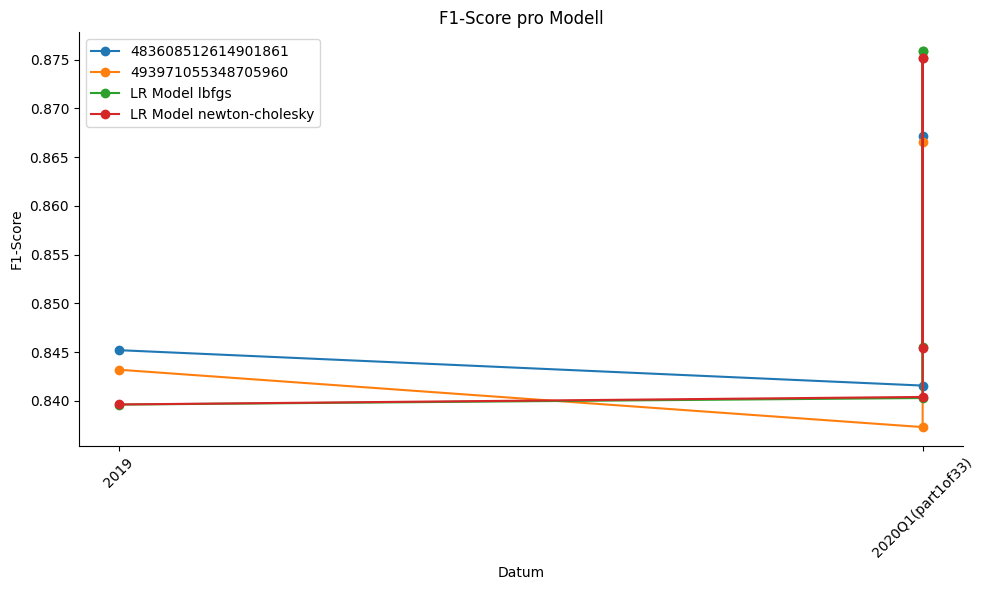

In [13]:
monitoring.renew_chart(date_info)

In [3]:
monitoring.performance_monitoring(new_data, date_info)

Der prozentuale Unterschied zwischen dem ursprünglichen und neuem F1-Score des jeweils besten Modells liegt bei -0.09716346020703374
F1-Score ist 0.9609764483410693 und somit nicht um mindestens 5% schlechter als beim letzen Training. Es erfolgt kein Neutraining
Modell geladen: LR Model lbfgs
Runname: LR_lbfgs_2020Q1(part1of33)
Test-Metriken für LR Model lbfgs berechnet und geloggt
Modell geladen: LR Model newton-cholesky
Runname: LR_newton-cholesky_2020Q1(part1of33)
Test-Metriken für LR Model newton-cholesky berechnet und geloggt
Modell geladen: RF Model 40 trees
Runname: RF_40trees_2020Q1(part1of33)
Test-Metriken für RF Model 40 trees berechnet und geloggt
Modell geladen: RF Model 20 trees
Runname: RF_20trees_2020Q1(part1of33)
Test-Metriken für RF Model 20 trees berechnet und geloggt
Das neue Champion-Modell ist: RF Model 20 trees
Das neue Challenger-Modell ist: RF Model 40 trees


In [4]:
monitoring.retrain_models(new_data, date_info)

2023/08/15 16:56:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logis

Test-Metriken für LR Model lbfgs berechnet und geloggt


c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'LR Model lbfgs' already exists. Creating a new version of this model...
2023/08/15 16:56:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model lbfgs, version 2
Created version '2' of model 'LR Model lbfgs'.
2023/08/15 16:56:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. Th

Test-Metriken für LR Model newton-cholesky berechnet und geloggt


Registered model 'LR Model newton-cholesky' already exists. Creating a new version of this model...
2023/08/15 16:56:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model newton-cholesky, version 2
Created version '2' of model 'LR Model newton-cholesky'.
2023/08/15 16:56:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer colu

Test-Metriken für RF Model 20 trees berechnet und geloggt


Registered model 'RF Model 20 trees' already exists. Creating a new version of this model...
2023/08/15 16:56:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: RF Model 20 trees, version 2
Created version '2' of model 'RF Model 20 trees'.
2023/08/15 16:56:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float

Test-Metriken für RF Model 40 trees berechnet und geloggt


Registered model 'RF Model 40 trees' already exists. Creating a new version of this model...
2023/08/15 16:57:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: RF Model 40 trees, version 2
Created version '2' of model 'RF Model 40 trees'.


Das neue Champion-Modell ist: RF Model 20 trees
Das neue Challenger-Modell ist: RF Model 40 trees
Counter-Wert ist: 1


In [6]:
monitoring.drift_test(new_data, date_info)

Liste mit kategorischen Spalten erstellt: ['country_ca', 'country_cn', 'country_de', 'country_es', 'country_fr', 'country_gb', 'country_it', 'country_jp', 'country_nl', 'country_other_or_unknown', 'country_us', 'gender_female', 'gender_male', 'gender_unknown', 'min_one_pres', 'quali_consumer_or_nonhealthprof', 'quali_lawyer', 'quali_other_health_prof', 'quali_pharmacist', 'quali_physician', 'report_from_study', 'report_other', 'report_spontaneous', 'report_unknown']
Liste mit numerischen Spalten erstellt: ['route_intraarterial', 'route_intradermal', 'route_intramuscular', 'route_intrauterine', 'route_intravenous', 'route_intravitreal', 'route_nasal', 'route_ophthalmic', 'route_oral', 'route_other_or_unknown', 'route_rectal', 'route_respiratory_inhalation', 'route_subcutaneous', 'route_sublingual', 'route_topical', 'route_transdermal', 'route_vaginal', 'age']
Column Mapping erstellt.
The drift is detected for 25.6% features (11 out of 43). The test threshold is lt=0.2
Data Drift erkannt

2023/08/15 17:00:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logis

Test-Metriken für LR Model lbfgs berechnet und geloggt


Registered model 'LR Model lbfgs' already exists. Creating a new version of this model...
2023/08/15 17:00:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model lbfgs, version 2
Created version '2' of model 'LR Model lbfgs'.
2023/08/15 17:00:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whene

Test-Metriken für LR Model newton-cholesky berechnet und geloggt


Registered model 'LR Model newton-cholesky' already exists. Creating a new version of this model...
2023/08/15 17:00:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LR Model newton-cholesky, version 2
Created version '2' of model 'LR Model newton-cholesky'.
2023/08/15 17:00:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paul Strohmeier\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer colu

KeyboardInterrupt: 

In [7]:
import mlflow
mlflow.set_tracking_uri("file:///c:/Users/Paul%20Strohmeier/Desktop/ma-accantec/Code/mlruns")

In [8]:
mlflow.get_tracking_uri()

'file:///c:/Users/Paul%20Strohmeier/Desktop/ma-accantec/Code/mlruns'

## Noch zu testen

In [38]:
import requests
from zipfile import ZipFile
from io import BytesIO
import json
import pandas as pd

zipurl = "https://download.open.fda.gov/drug/event/2020q1/drug-event-0033-of-0033.json.zip"
print("Download von Datei {} gestartet.".format(zipurl))
req = requests.get(zipurl)
with ZipFile(BytesIO(req.content)) as zip_file:
    with zip_file.open(zip_file.namelist()[0]) as json_file:
        json_data = json.load(json_file)
        data = json_data['results']

df = pd.json_normalize(data)
df

Download von Datei https://download.open.fda.gov/drug/event/2020q1/drug-event-0033-of-0033.json.zip gestartet.


,safetyreportversion,safetyreportid,primarysourcecountry,occurcountry,transmissiondateformat,transmissiondate,reporttype,serious,receivedateformat,receivedate,...,reportduplicate.duplicatenumb,primarysource.qualification,patient.patientagegroup,seriousnessother,patient.patientweight,seriousnessdeath,primarysource.literaturereference,seriousnesslifethreatening,seriousnessdisabling,seriousnesscongenitalanomali
0,1,17395037,US,US,102,20200409,1,2,102,20200124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17362953,SE,SE,102,20200409,1,1,102,20200203,...,SE-MYLANLABS-2020M1011446,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,17363453,GB,GB,102,20200409,1,1,102,20200203,...,GB-BAUSCH-BL-2020-002702,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,17364249,NaN,CA,102,20200409,2,1,102,20200204,...,CA-ABBVIE-20K-028-3256138-00,1,NaN,1,64.47,NaN,NaN,NaN,NaN,NaN
4,1,17302634,US,US,102,20200409,2,2,102,20200122,...,NVSC2020US016100,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2,17047581,CA,CA,102,20200409,1,1,102,20191119,...,CA-PFIZER INC-2019491577,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
977,2,17057546,IN,IN,102,20200409,2,1,102,20191121,...,IN-INVENTIA-000337,1,5,1,NaN,NaN,"GUPTA S, TAKKAR N, GOEL P, MATERNAL AND NEONAT...",NaN,NaN,NaN
978,2,17057536,US,US,102,20200409,1,2,102,20191121,...,US-UNITED THERAPEUTICS-UNT-2019-019435,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,1,17574218,US,US,102,20201104,1,1,102,20200323,...,US-ASTRAZENECA-2020SE39940,5,NaN,1,60.8,NaN,NaN,NaN,NaN,NaN


In [39]:
import sys
counter = 11

def new_data():
    if counter > 10:
        sys.exit()

def hi():
    print('los')
    new_data()
    print('hi')

In [40]:
hi()

los


SystemExit: 

C:\Users\Paul Strohmeier\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import monitoring
import pandas as pd
new_data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_3_2020Q3.csv")
new_data.info()

monitoring.log_model_performance(new_data, '2020Q3')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              7473 non-null   float64
 1   country_ca                       7473 non-null   int64  
 2   country_cn                       7473 non-null   int64  
 3   country_de                       7473 non-null   int64  
 4   country_es                       7473 non-null   int64  
 5   country_fr                       7473 non-null   int64  
 6   country_gb                       7473 non-null   int64  
 7   country_it                       7473 non-null   int64  
 8   country_jp                       7473 non-null   int64  
 9   country_nl                       7473 non-null   int64  
 10  country_other_or_unknown         7473 non-null   int64  
 11  country_us                       7473 non-null   int64  
 12  gender_female       

In [44]:
new_data = new_data.astype({col: 'int32' for col in new_data.select_dtypes('int64').columns})

In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7547 entries, 0 to 7546
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              7547 non-null   float64
 1   country_ca                       7547 non-null   int32  
 2   country_cn                       7547 non-null   int32  
 3   country_de                       7547 non-null   int32  
 4   country_es                       7547 non-null   int32  
 5   country_fr                       7547 non-null   int32  
 6   country_gb                       7547 non-null   int32  
 7   country_it                       7547 non-null   int32  
 8   country_jp                       7547 non-null   int32  
 9   country_nl                       7547 non-null   int32  
 10  country_other_or_unknown         7547 non-null   int32  
 11  country_us                       7547 non-null   int32  
 12  gender_female       

                       model  metrics.f1_score_X_test    date
0             LR Model lbfgs                 0.839608    2019
1   LR Model newton-cholesky                 0.839643    2019
2          RF Model 20 trees                 0.843651    2019
3          RF Model 40 trees                 0.844502    2019
4             LR Model lbfgs                 0.875874  2020Q1
5   LR Model newton-cholesky                 0.875125  2020Q1
6          RF Model 20 trees                 0.870620  2020Q1
7          RF Model 40 trees                 0.866511  2020Q1
8             LR Model lbfgs                 0.880904  2020Q2
9   LR Model newton-cholesky                 0.881128  2020Q2
10         RF Model 20 trees                 0.877530  2020Q2
11         RF Model 40 trees                 0.878945  2020Q2
12            LR Model lbfgs                 0.889836  2020Q3
13  LR Model newton-cholesky                 0.889909  2020Q3
14         RF Model 20 trees                 0.868419  2020Q3
15      

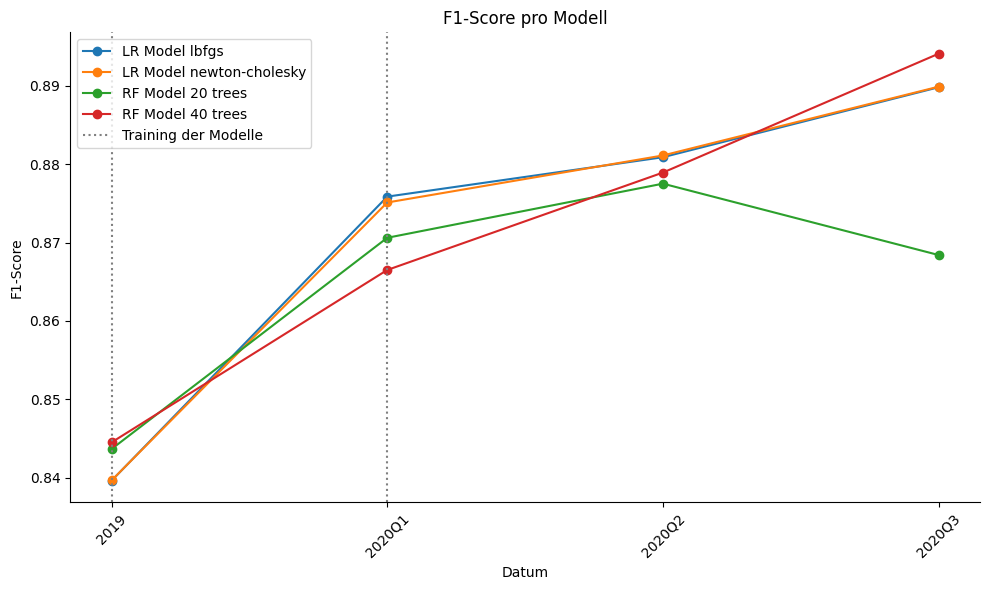

In [4]:
import monitoring
monitoring.renew_chart('2020Q3')

In [1]:
import monitoring
monitoring.change_role_tag()

file:///c:/Users/Paul%20Strohmeier/Desktop/ma-accantec/Code/mlruns
Das neue Champion-Modell ist: LR Model lbfgs
Das neue Challenger-Modell ist: LR Model newton-cholesky


In [2]:
import mlflow
experiment_ids = ["532585148427554333", "142704143808532679", "654653382223571780", "892816848484979934"]
new_runs = mlflow.search_runs(
            experiment_ids=experiment_ids,
            max_results = 4,
            order_by=["start_time DESC"],
        )
new_runs = new_runs.sort_values(by=['metrics.f1_score_X_test'], ascending=False).reset_index(drop=True)
new_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_score_X_test,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.git.commit,tags.mlflow.source.name
0,d88571739ea04146ab46cae2cabd0bf7,532585148427554333,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-16 11:44:02.253000+00:00,2023-08-16 11:44:02.386000+00:00,0.880934,Paul Strohmeier,LR_lbfgs_2021Q3,LOCAL,6277a732852d463f7b13956be91d0981ca9ccff4,main.py
1,05045ac5f89b457986071351543deba2,142704143808532679,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-16 11:44:02.473000+00:00,2023-08-16 11:44:02.604000+00:00,0.880814,Paul Strohmeier,LR_newton-cholesky_2021Q3,LOCAL,6277a732852d463f7b13956be91d0981ca9ccff4,main.py
2,f8fed0b4616f460984b6d1dd2ed16b29,892816848484979934,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-16 11:44:02.979000+00:00,2023-08-16 11:44:03.160000+00:00,0.869687,Paul Strohmeier,RF_40trees_2021Q3,LOCAL,6277a732852d463f7b13956be91d0981ca9ccff4,main.py
3,8b02ec02427e415f910ed9cec6ef1f63,654653382223571780,FINISHED,file:///c:/Users/Paul%20Strohmeier/Desktop/ma-...,2023-08-16 11:44:02.687000+00:00,2023-08-16 11:44:02.844000+00:00,0.866045,Paul Strohmeier,RF_20trees_2021Q3,LOCAL,6277a732852d463f7b13956be91d0981ca9ccff4,main.py


In [7]:
new_runs.experiment_id[0]

'532585148427554333'

In [3]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, DataQualityPreset
import os
import pandas as pd
import monitoring

# Datum der Datei für Ordnererstellung nutzen
folder_path = r'c:\Users\Paul Strohmeier\Desktop\ma-accantec\Reports\{}'.format('2020Q1')

# Ordner erstellen
#os.makedirs(folder_path)
#print(folder_path + " erfolgreich erstellt.")

### Berichte
# Daten von dem aktuellen Modell
#path = r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_0_2019.csv"
#file_name = os.listdir(path)[0]
ref_data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_0_2019.csv")
#print("Referenzdaten geladen: " + file_name)

new_data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_1_2020Q1.csv")

## Data Drift Report
print("Data Drift Report begonnen.")
drift_report = Report(metrics=[DataDriftPreset(drift_share=0.2)])
drift_report.run(reference_data=ref_data, current_data=new_data, column_mapping=monitoring.get_column_mapping(new_data))
drift_report.save_html(os.path.join(folder_path, "Drift_Report.html"))
print("Data Drift Report gespeichert.")

Data Drift Report begonnen.
Liste mit kategorischen Spalten erstellt: ['country_ca', 'country_cn', 'country_de', 'country_es', 'country_fr', 'country_gb', 'country_it', 'country_jp', 'country_nl', 'country_other_or_unknown', 'country_us', 'gender_female', 'gender_male', 'gender_unknown', 'min_one_pres', 'quali_consumer_or_nonhealthprof', 'quali_lawyer', 'quali_other_health_prof', 'quali_pharmacist', 'quali_physician', 'report_from_study', 'report_other', 'report_spontaneous', 'report_unknown']
Liste mit numerischen Spalten erstellt: ['route_intraarterial', 'route_intradermal', 'route_intramuscular', 'route_intrauterine', 'route_intravenous', 'route_intravitreal', 'route_nasal', 'route_ophthalmic', 'route_oral', 'route_other_or_unknown', 'route_rectal', 'route_respiratory_inhalation', 'route_subcutaneous', 'route_sublingual', 'route_topical', 'route_transdermal', 'route_vaginal', 'age']
Column Mapping erstellt.
Data Drift Report gespeichert.


In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_0_2019.csv")

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data

,age,country_ca,country_cn,country_de,country_es,country_fr,country_gb,country_it,country_jp,country_nl,...,route_oral,route_other_or_unknown,route_rectal,route_respiratory_inhalation,route_subcutaneous,route_sublingual,route_topical,route_transdermal,route_vaginal,serious
0,-0.004033,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,-1.945609,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0.944178,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0.628108,0,0,0,0,0,0,0,0,0,...,4,9,0,0,0,0,0,0,0,1
4,1.079637,0,0,0,0,0,1,0,0,0,...,2,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158734,-0.320104,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
158735,1.395707,0,0,0,0,0,0,0,1,0,...,0,6,0,0,1,0,0,0,0,1
158736,1.124790,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158737,1.395707,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.to_csv(r"C:\Users\Paul Strohmeier\Desktop\ma-accantec\Daten\csv\ml\ml_0_2019.csv", index=False)

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Paul Strohmeier\Desktop\Drug-data\pickle\data2019_ml_ready.csv")

In [7]:
df

,serious,age,min_one_pres,report_spontaneous,report_from_study,report_other,report_unknown,qualification_physician,qualification_pharmacist,qualification_other_health_prof,...,route_ophthalmic,route_oral,route_rectal,route_respiratory (inhalation),route_subcutaneous,route_sublingual,route_topical,route_transdermal,route_vaginal,route_other_or_unknown
0,1,53,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,10,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,74,1,1,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
3,1,67,1,1,0,0,0,1,0,0,...,0,4,0,0,0,0,0,0,0,9
4,1,77,1,1,0,0,0,0,1,0,...,0,2,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158734,1,46,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
158735,1,84,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,6
158736,0,78,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
158737,1,84,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import data_visualization
data_visualization.plot_data(df, '2019')

c:\Users\Paul Strohmeier\Desktop\ma-accantec\Grafiken\generated\2019 erfolgreich erstellt.
5 Grafiken erfolgreich erstellt und abgespeichert.


<Figure size 640x480 with 0 Axes>